In [ ]:
import google.colab
google.colab.auth.authenticate_user()

#authentication and establish connection
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 BasedOnMaterial   BasedOnPeriod   ClassData  'Colab Notebooks'   Edited.csv   models


In [ ]:
import tensorflow as tf
import os

In [ ]:
%cd /content/drive/MyDrive
os.listdir('/content/drive/MyDrive/BasedOnPeriod')

/content/drive/MyDrive


['Medieval', 'Roman']

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/BasedOnPeriod'
os.listdir(data_dir)

['Medieval', 'Roman']

In [ ]:
image_exts=['jpg','jpeg','png']

In [ ]:
img=cv2.imread(os.path.join('BasedOnPeriod','Medieval','Medieval200.jpg'))
imghdr.what(os.path.join('BasedOnPeriod','Medieval','Medieval200.jpg'))

'jpeg'

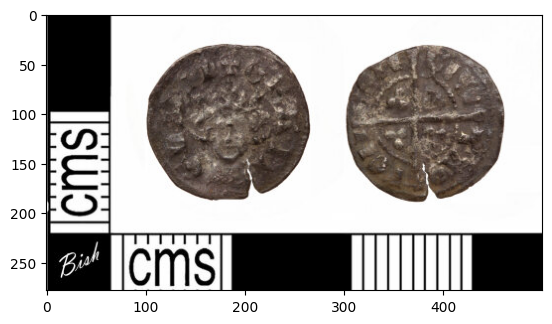

In [ ]:
img.shape
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory('BasedOnPeriod', batch_size=16, image_size=(128,128))
data = tf.keras.utils.image_dataset_from_directory('BasedOnPeriod')

Found 780 files belonging to 2 classes.
Found 780 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[1]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

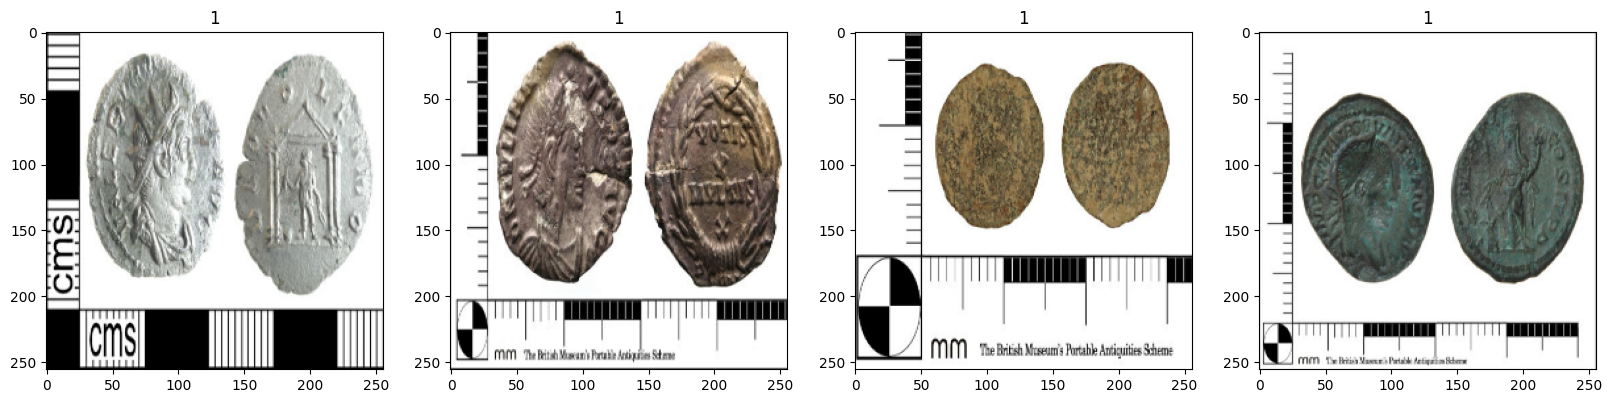

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0]/255
scaled.min()

0.0

In [ ]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

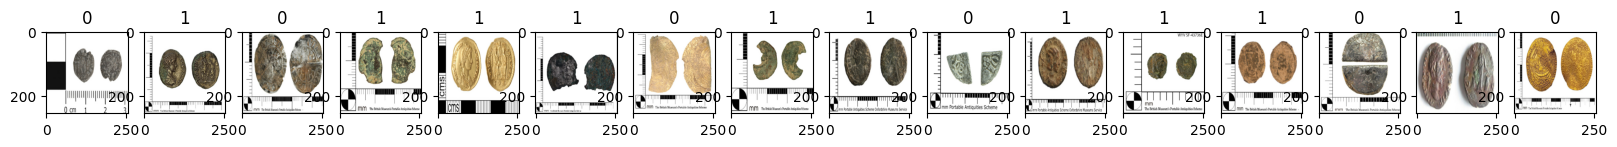

In [ ]:
fig,ax = plt.subplots(ncols=16,figsize=(20,20))
for idx,img in enumerate(batch[0][:16]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size+ test_size+ val_size

26

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
len(test)

2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3), 1, activation = 'relu', input_shape =(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile('adam',loss= tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir = '/content/drive/MyDrive/BasedOnPeriod'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs= 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
15/15 [==============================] - 41s 3s/step - loss: 0.6507 - accuracy: 0.6313 - val_loss: 0.6343 - val_accuracy: 0.6250
Epoch 2/20
15/15 [==============================] - 48s 3s/step - loss: 0.6013 - accuracy: 0.6667 - val_loss: 0.6333 - val_accuracy: 0.6406
Epoch 3/20
15/15 [==============================] - 42s 3s/step - loss: 0.5390 - accuracy: 0.7208 - val_loss: 0.5674 - val_accuracy: 0.7031
Epoch 4/20
15/15 [==============================] - 38s 2s/step - loss: 0.5046 - accuracy: 0.7604 - val_loss: 0.4925 - val_accuracy: 0.7578
Epoch 5/20
15/15 [==============================] - 39s 2s/step - loss: 0.4947 - accuracy: 0.7521 - val_loss: 0.4489 - val_accuracy: 0.7930
Epoch 6/20
15/15 [==============================] - 41s 3s/step - loss: 0.4339 - accuracy: 0.7958 - val_loss: 0.4138 - val_accuracy: 0.8242
Epoch 7/20
15/15 [==============================] - 42s 3s/step - loss: 0.4129 - accuracy: 0.8062 - val_loss: 0.4099 - val_accuracy: 0.8203
Epoch 8/20
15/15 [==

In [ ]:
hist.history

{'loss': [0.6506924033164978,
  0.6013211607933044,
  0.5389668941497803,
  0.5046156644821167,
  0.4946921169757843,
  0.43391117453575134,
  0.4129343330860138,
  0.3186393976211548,
  0.3251867890357971,
  0.2930484116077423,
  0.2750559449195862,
  0.22644522786140442,
  0.19621971249580383,
  0.1624448001384735,
  0.16012908518314362,
  0.14697499573230743,
  0.11756252497434616,
  0.12465066462755203,
  0.08521350473165512,
  0.08130244165658951],
 'accuracy': [0.6312500238418579,
  0.6666666865348816,
  0.7208333611488342,
  0.7604166865348816,
  0.7520833611488342,
  0.7958333492279053,
  0.8062499761581421,
  0.8666666746139526,
  0.831250011920929,
  0.862500011920929,
  0.8854166865348816,
  0.8979166746139526,
  0.925000011920929,
  0.9291666746139526,
  0.9375,
  0.9395833611488342,
  0.956250011920929,
  0.9583333134651184,
  0.9750000238418579,
  0.9770833253860474],
 'val_loss': [0.6342759132385254,
  0.6333146691322327,
  0.5674313306808472,
  0.4924784004688263,
  0.4

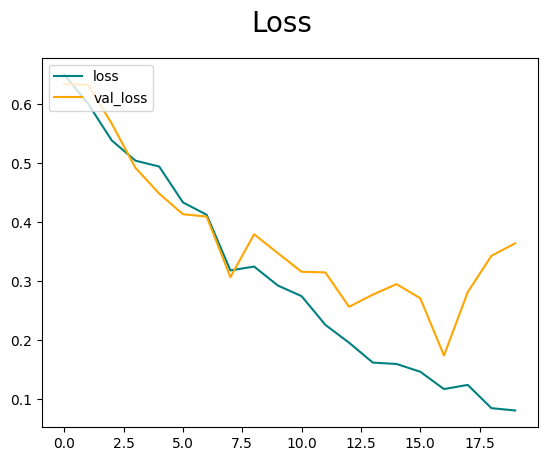

In [ ]:
fig = plt.figure()
plt.plot(hist.history["loss"], color = 'teal', label = 'loss')
plt.plot(hist.history["val_loss"], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc= "upper left")
plt.show()

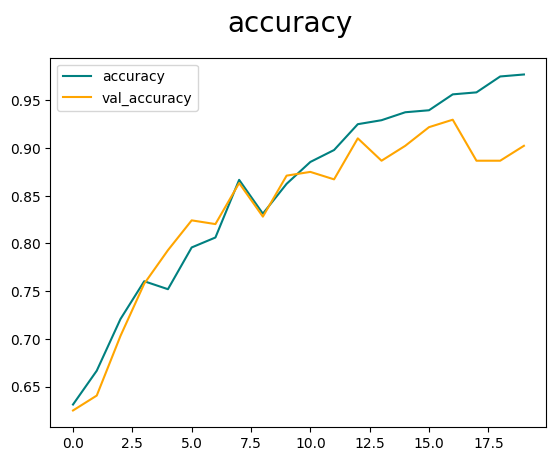

In [ ]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color = 'teal', label = 'accuracy')
plt.plot(hist.history["val_accuracy"], color = 'orange', label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc= "upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()
len(test)

2

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  rec.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 235ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8214285969734192, Recall: 0.9583333134651184, Accuracy: 0.8636363744735718


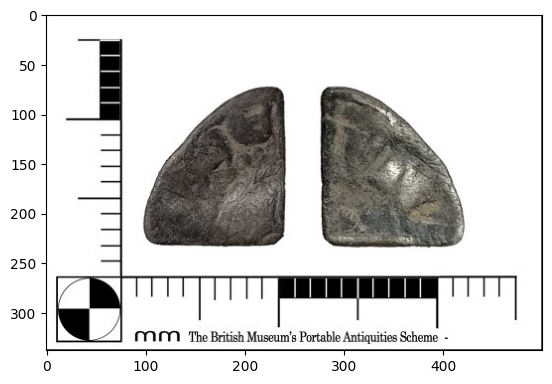

In [ ]:
img = cv2.imread('/content/drive/MyDrive/BasedOnPeriod/Medieval/Medieval120.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

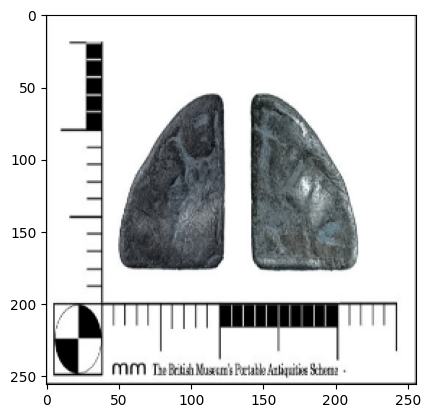

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 40ms/step


In [ ]:
yhat

array([[0.01136908]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is ROMAN')
else:
  print(f'Predicted class is MEDIEVAL')

Predicted class is MEDIEVAL


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','periodModel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
os.path.join('models','periodModel.h5')

'models/periodModel.h5'

In [ ]:
new_model = load_model(os.path.join('models','periodModel.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 104ms/step


In [ ]:
if yhatnew > 0.5:
  print(f'Predicted class is ROMAN')
else:
  print(f'Predicted class is MEDIEVAL')

Predicted class is MEDIEVAL


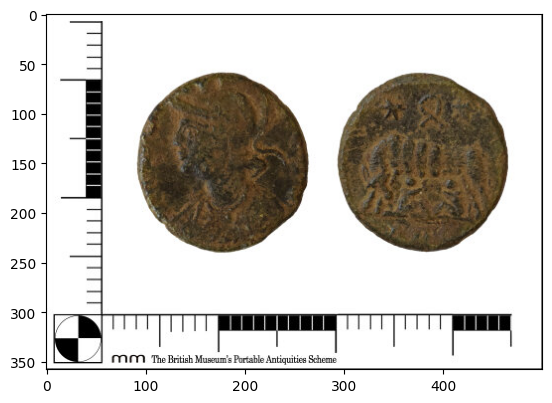

In [ ]:
img = cv2.imread('/content/drive/MyDrive/BasedOnPeriod/Roman/Roman200.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

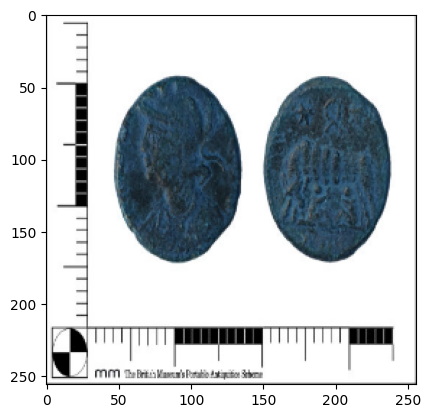

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 39ms/step


In [ ]:
yhat

array([[0.99981314]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is ROMAN')
else:
  print(f'Predicted class is MEDIEVAL')

Predicted class is ROMAN
